## Exercise E1. Boeing Data Analysis

In a brand new Jupyter notebook, repeat the same exercise for **Boeing** (Code "BA"), or free free to go for a company of your choice. What kind of trends do you see. Could you detect anomalous points in volume variable? Explain your findings in a markdown block.

**Offline-** Try to repeat the exercise by setting K=5 in K-means clustering. **(Important Note: You would need to loop over the centroids 5-times here)***. Does that make a difference?

In [3]:
try:
    import yfinance
except:
    import sys
    !pip install yfinance
    import yfinance

start_date = "2022-04-17"
end_date = "2023-04-17"
data_df = yfinance.download('GOOG', start_date, end_date)
data_df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-04-18,127.410004,128.712006,126.578453,127.960999,127.960999,14918000
2022-04-19,128.076996,130.903748,127.451500,130.531006,130.531006,22720000
2022-04-20,131.283997,131.923492,127.894051,128.245499,128.245499,22610000
2022-04-21,129.350006,130.307495,124.650002,124.937500,124.937500,30158000
2022-04-22,125.000000,125.452003,119.140503,119.613998,119.613998,46410000


Text(0, 0.5, 'Price')

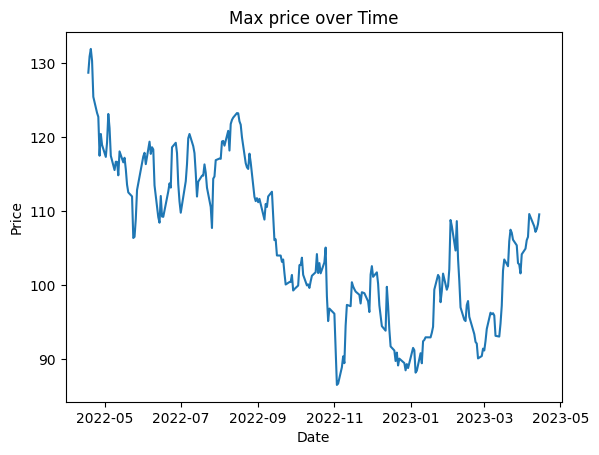

In [6]:
from matplotlib import pyplot

pyplot.plot(data_df["High"])
pyplot.title("Max price over Time")
pyplot.xlabel("Date")
pyplot.ylabel("Price")

Text(0, 0.5, 'Volume')

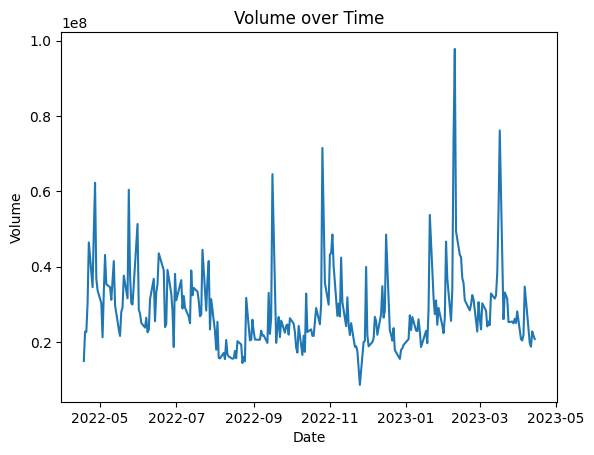

In [7]:
pyplot.plot(data_df["Volume"])
pyplot.title("Volume over Time")
pyplot.xlabel("Date")
pyplot.ylabel("Volume")

In [8]:
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters=2, random_state=0, n_init=1)
kmeans_model.fit(data_df[["Volume"]].to_numpy())

center = kmeans_model.cluster_centers_

print(center)

[[24886811.59420291]
 [47514653.4883721 ]]


<ipython-input-12-5c8ea91639d3>:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  distance1 = sqrt((volume - center[0])**2)
<ipython-input-12-5c8ea91639d3>:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  distance2 = sqrt((volume - center[1])**2)


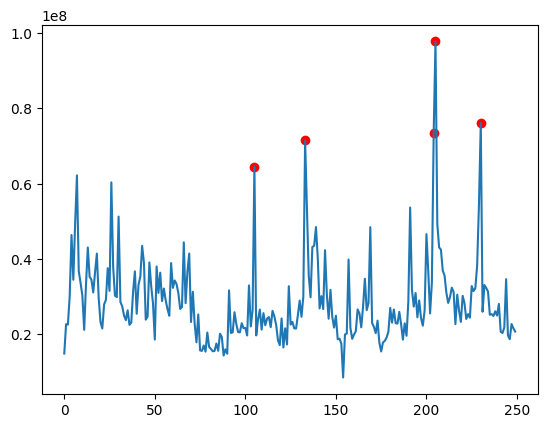

In [12]:
# we are trying to find out indices of volume values that are too far from either of the centers
from math import sqrt

index = 0
distance_data = {}

for volume in data_df["Volume"]:
    distance1 = sqrt((volume - center[0])**2)
    distance2 = sqrt((volume - center[1])**2)
    sum_distance = distance1+distance2
    distance_data[index] = sum_distance
    index=index+1

# Sort the dictionary by value
top_5_X = []
top_5_Y = []

for point in sorted(distance_data,key=distance_data.get,reverse=True):
    top_5_X.append(point)
    top_5_Y.append(data_df["Volume"][point])

#Take the top 5 values as anomalous and plot them

# First plot the original data
pyplot.plot(range(len(data_df["Volume"])), data_df["Volume"])

# Then add a layer scatter plotting the anomalous points
pyplot.scatter(top_5_X[:5],top_5_Y[:5],color="red")




<ipython-input-11-0c508f4785fb>:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  distance1 = sqrt((volume - center[0])**2)
<ipython-input-11-0c508f4785fb>:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  distance2 = sqrt((volume - center[1])**2)
<ipython-input-11-0c508f4785fb>:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  distance3 = sqrt((volume - center[2])**2)
<ipython-input-11-0c508f4785fb>:16: DeprecationWarning: Conversion of an array with ndim > 0 to a

Text(0, 0.5, 'Volume')

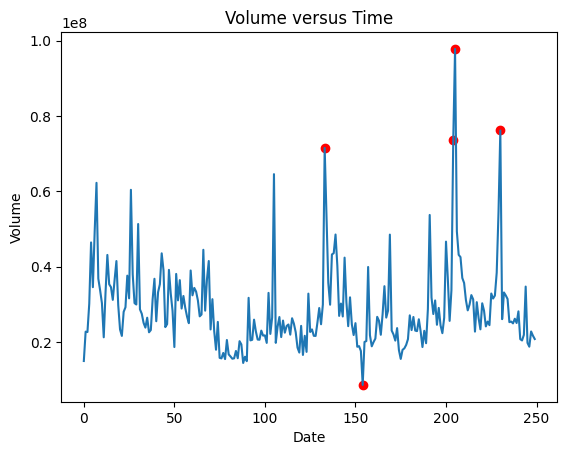

In [11]:
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters=5, random_state=0, n_init=1)
kmeans_model.fit(data_df[["Volume"]].to_numpy())

center = kmeans_model.cluster_centers_

from math import sqrt

index = 0
distance_data = {}

for volume in data_df["Volume"]:
    distance1 = sqrt((volume - center[0])**2)
    distance2 = sqrt((volume - center[1])**2)
    distance3 = sqrt((volume - center[2])**2)
    distance4 = sqrt((volume - center[3])**2)
    distance5 = sqrt((volume - center[4])**2)
    sum_distance = distance1+distance2+distance3+distance4+distance5
    distance_data[index] = sum_distance
    index=index+1

top_5_X = []
top_5_Y = []

for point in sorted(distance_data,key=distance_data.get,reverse=True):
    top_5_X.append(point)
    top_5_Y.append(data_df["Volume"][point])

pyplot.plot(range(len(data_df["Volume"])), data_df["Volume"])

pyplot.scatter(top_5_X[:5],top_5_Y[:5],color="red")
pyplot.title("Volume versus Time")
pyplot.xlabel("Date")
pyplot.ylabel("Volume")

The biggest difference I see is that using 5 clusters yields negative points as well, not just positives.